In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("./50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
one_hot_encoded_data=pd.get_dummies(data,columns=["State"])
x=one_hot_encoded_data.drop(["Profit"],axis=1)
y=one_hot_encoded_data[["Profit"]]
print(y,type(y))
print(x,type(x))
frames=[x,y]
result = pd.concat(frames, axis=1).reindex(x.index)
result

       Profit
0   192261.83
1   191792.06
2   191050.39
3   182901.99
4   166187.94
5   156991.12
6   156122.51
7   155752.60
8   152211.77
9   149759.96
10  146121.95
11  144259.40
12  141585.52
13  134307.35
14  132602.65
15  129917.04
16  126992.93
17  125370.37
18  124266.90
19  122776.86
20  118474.03
21  111313.02
22  110352.25
23  108733.99
24  108552.04
25  107404.34
26  105733.54
27  105008.31
28  103282.38
29  101004.64
30   99937.59
31   97483.56
32   97427.84
33   96778.92
34   96712.80
35   96479.51
36   90708.19
37   89949.14
38   81229.06
39   81005.76
40   78239.91
41   77798.83
42   71498.49
43   69758.98
44   65200.33
45   64926.08
46   49490.75
47   42559.73
48   35673.41
49   14681.40 <class 'pandas.core.frame.DataFrame'>
    R&D Spend  Administration  Marketing Spend  State_California  \
0   165349.20       136897.80        471784.10                 0   
1   162597.70       151377.59        443898.53                 1   
2   153441.51       101145.55        407934.

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94
5,131876.90,99814.71,362861.36,0,0,1,156991.12
6,134615.46,147198.87,127716.82,1,0,0,156122.51
7,130298.13,145530.06,323876.68,0,1,0,155752.60
8,120542.52,148718.95,311613.29,0,0,1,152211.77
9,123334.88,108679.17,304981.62,1,0,0,149759.96


In [5]:
print(data.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [6]:
print(data.isnull().any())

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


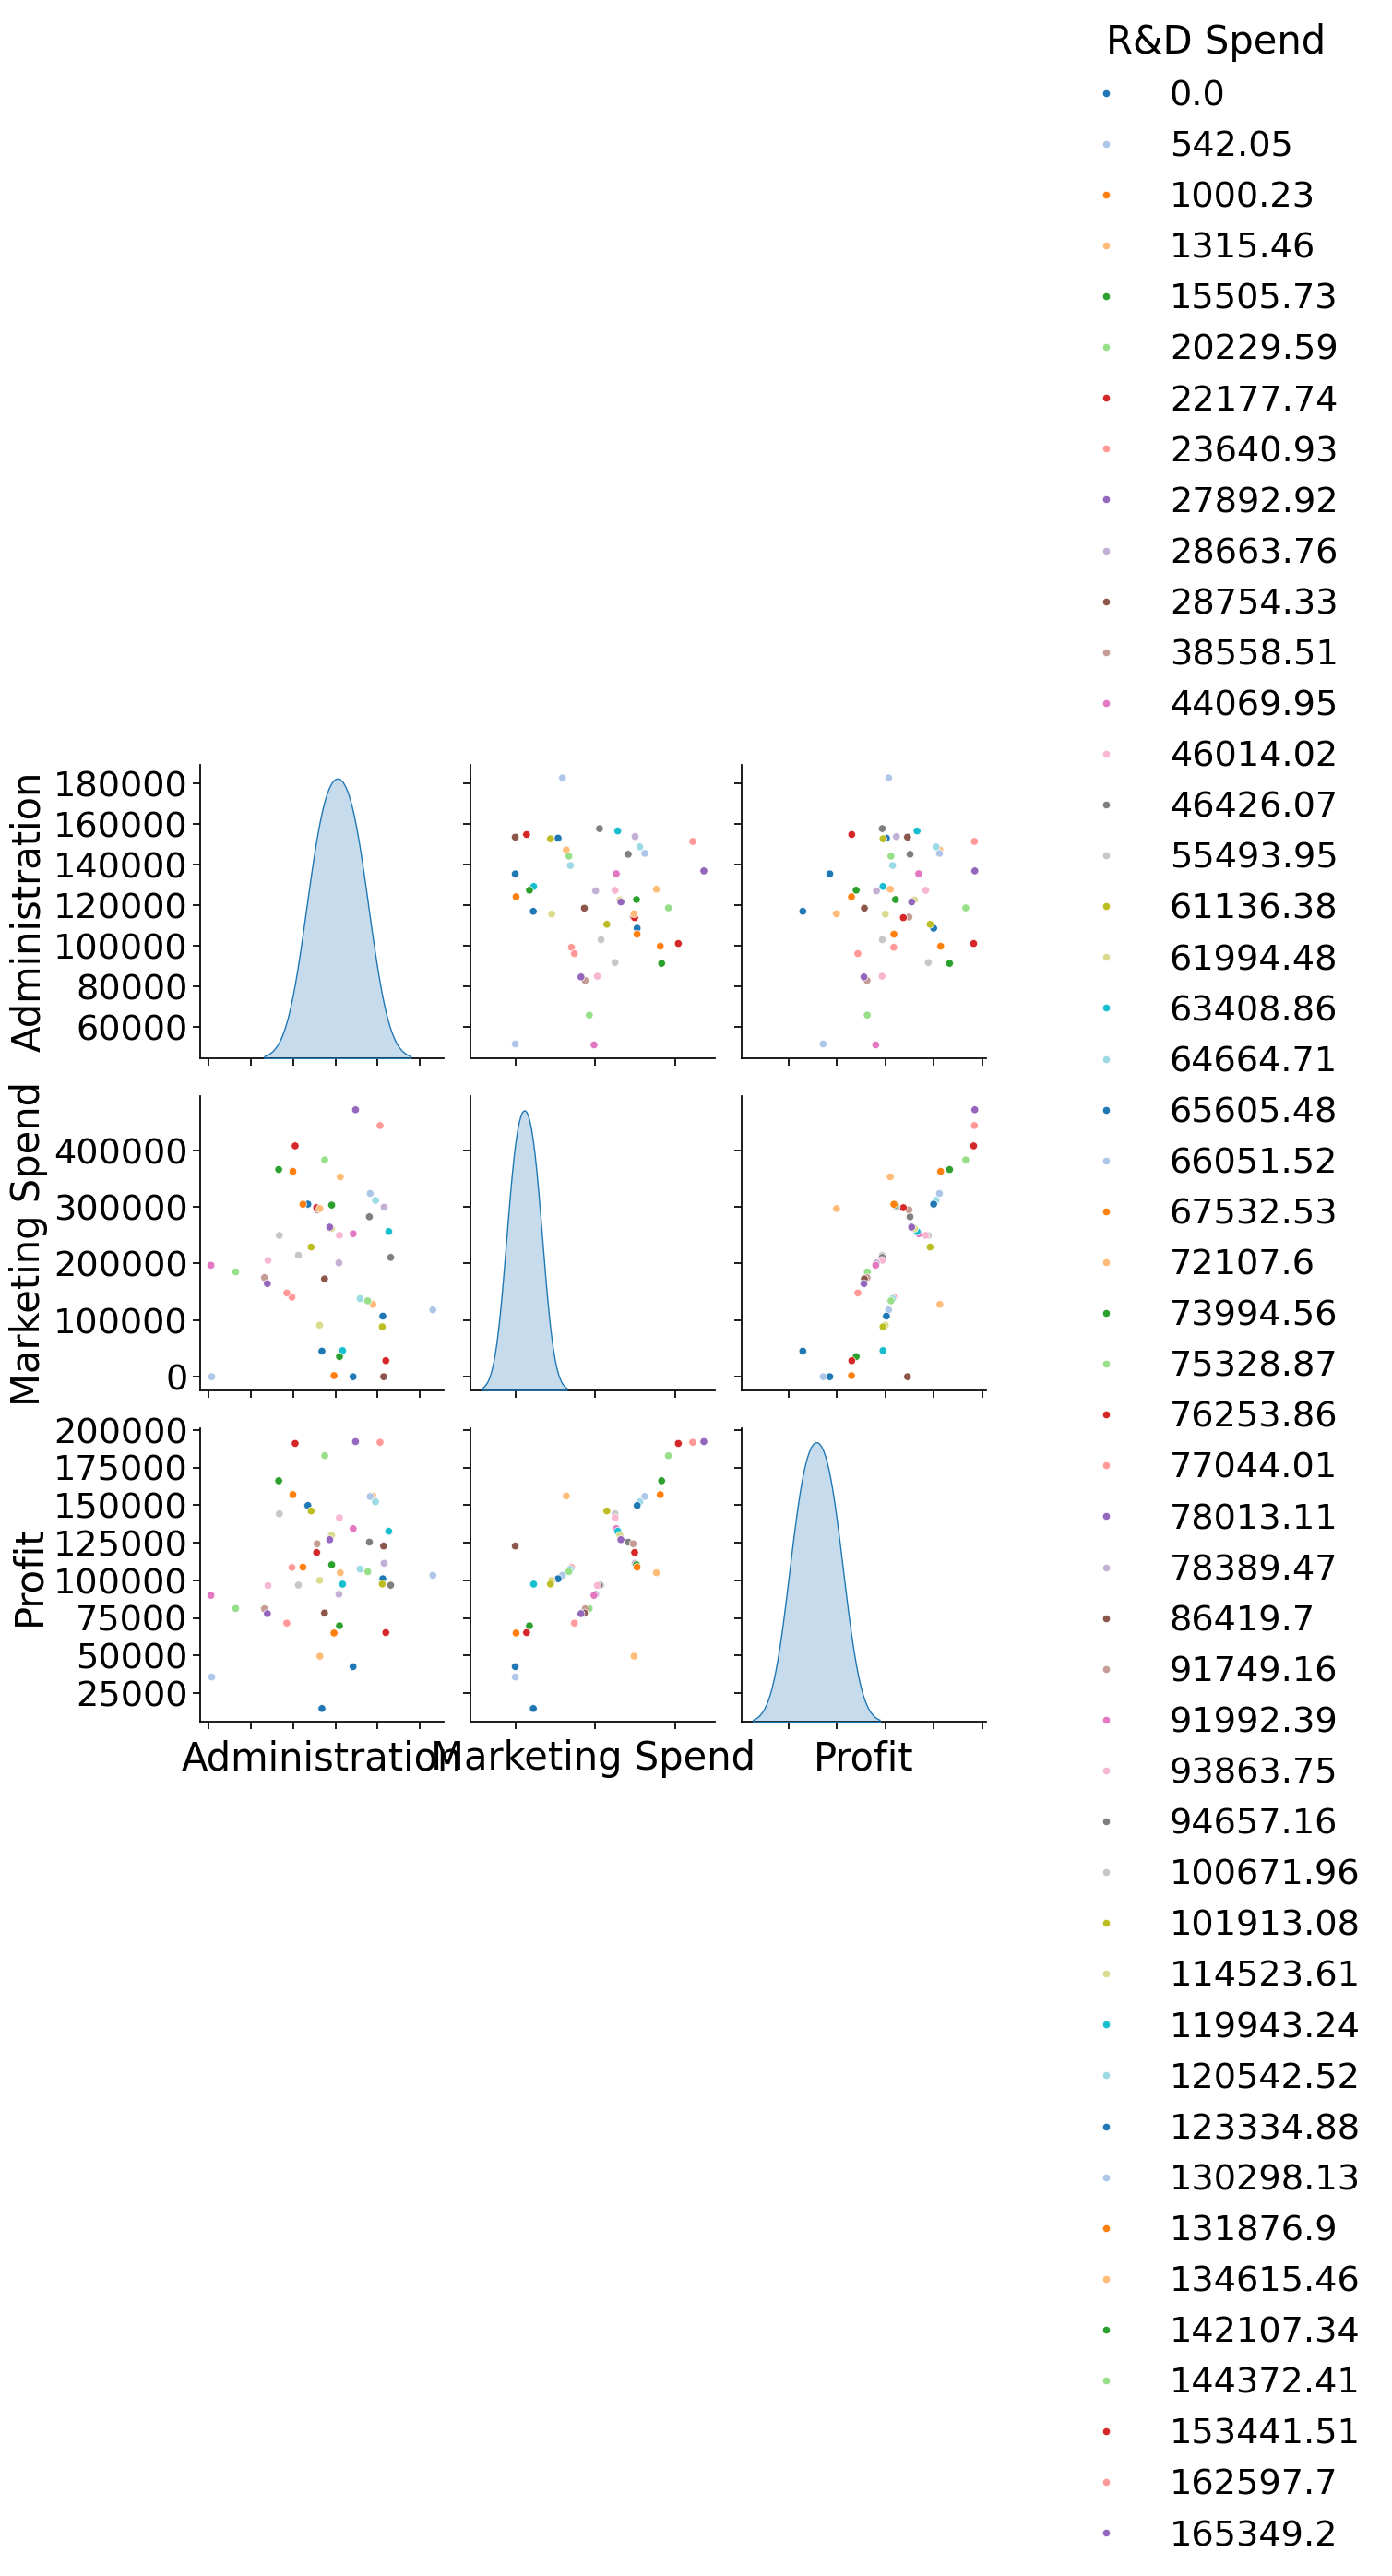

In [7]:
import seaborn as sns
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(data,hue='R&D Spend', palette='tab20',size=4)

g.set(xticklabels=[]);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


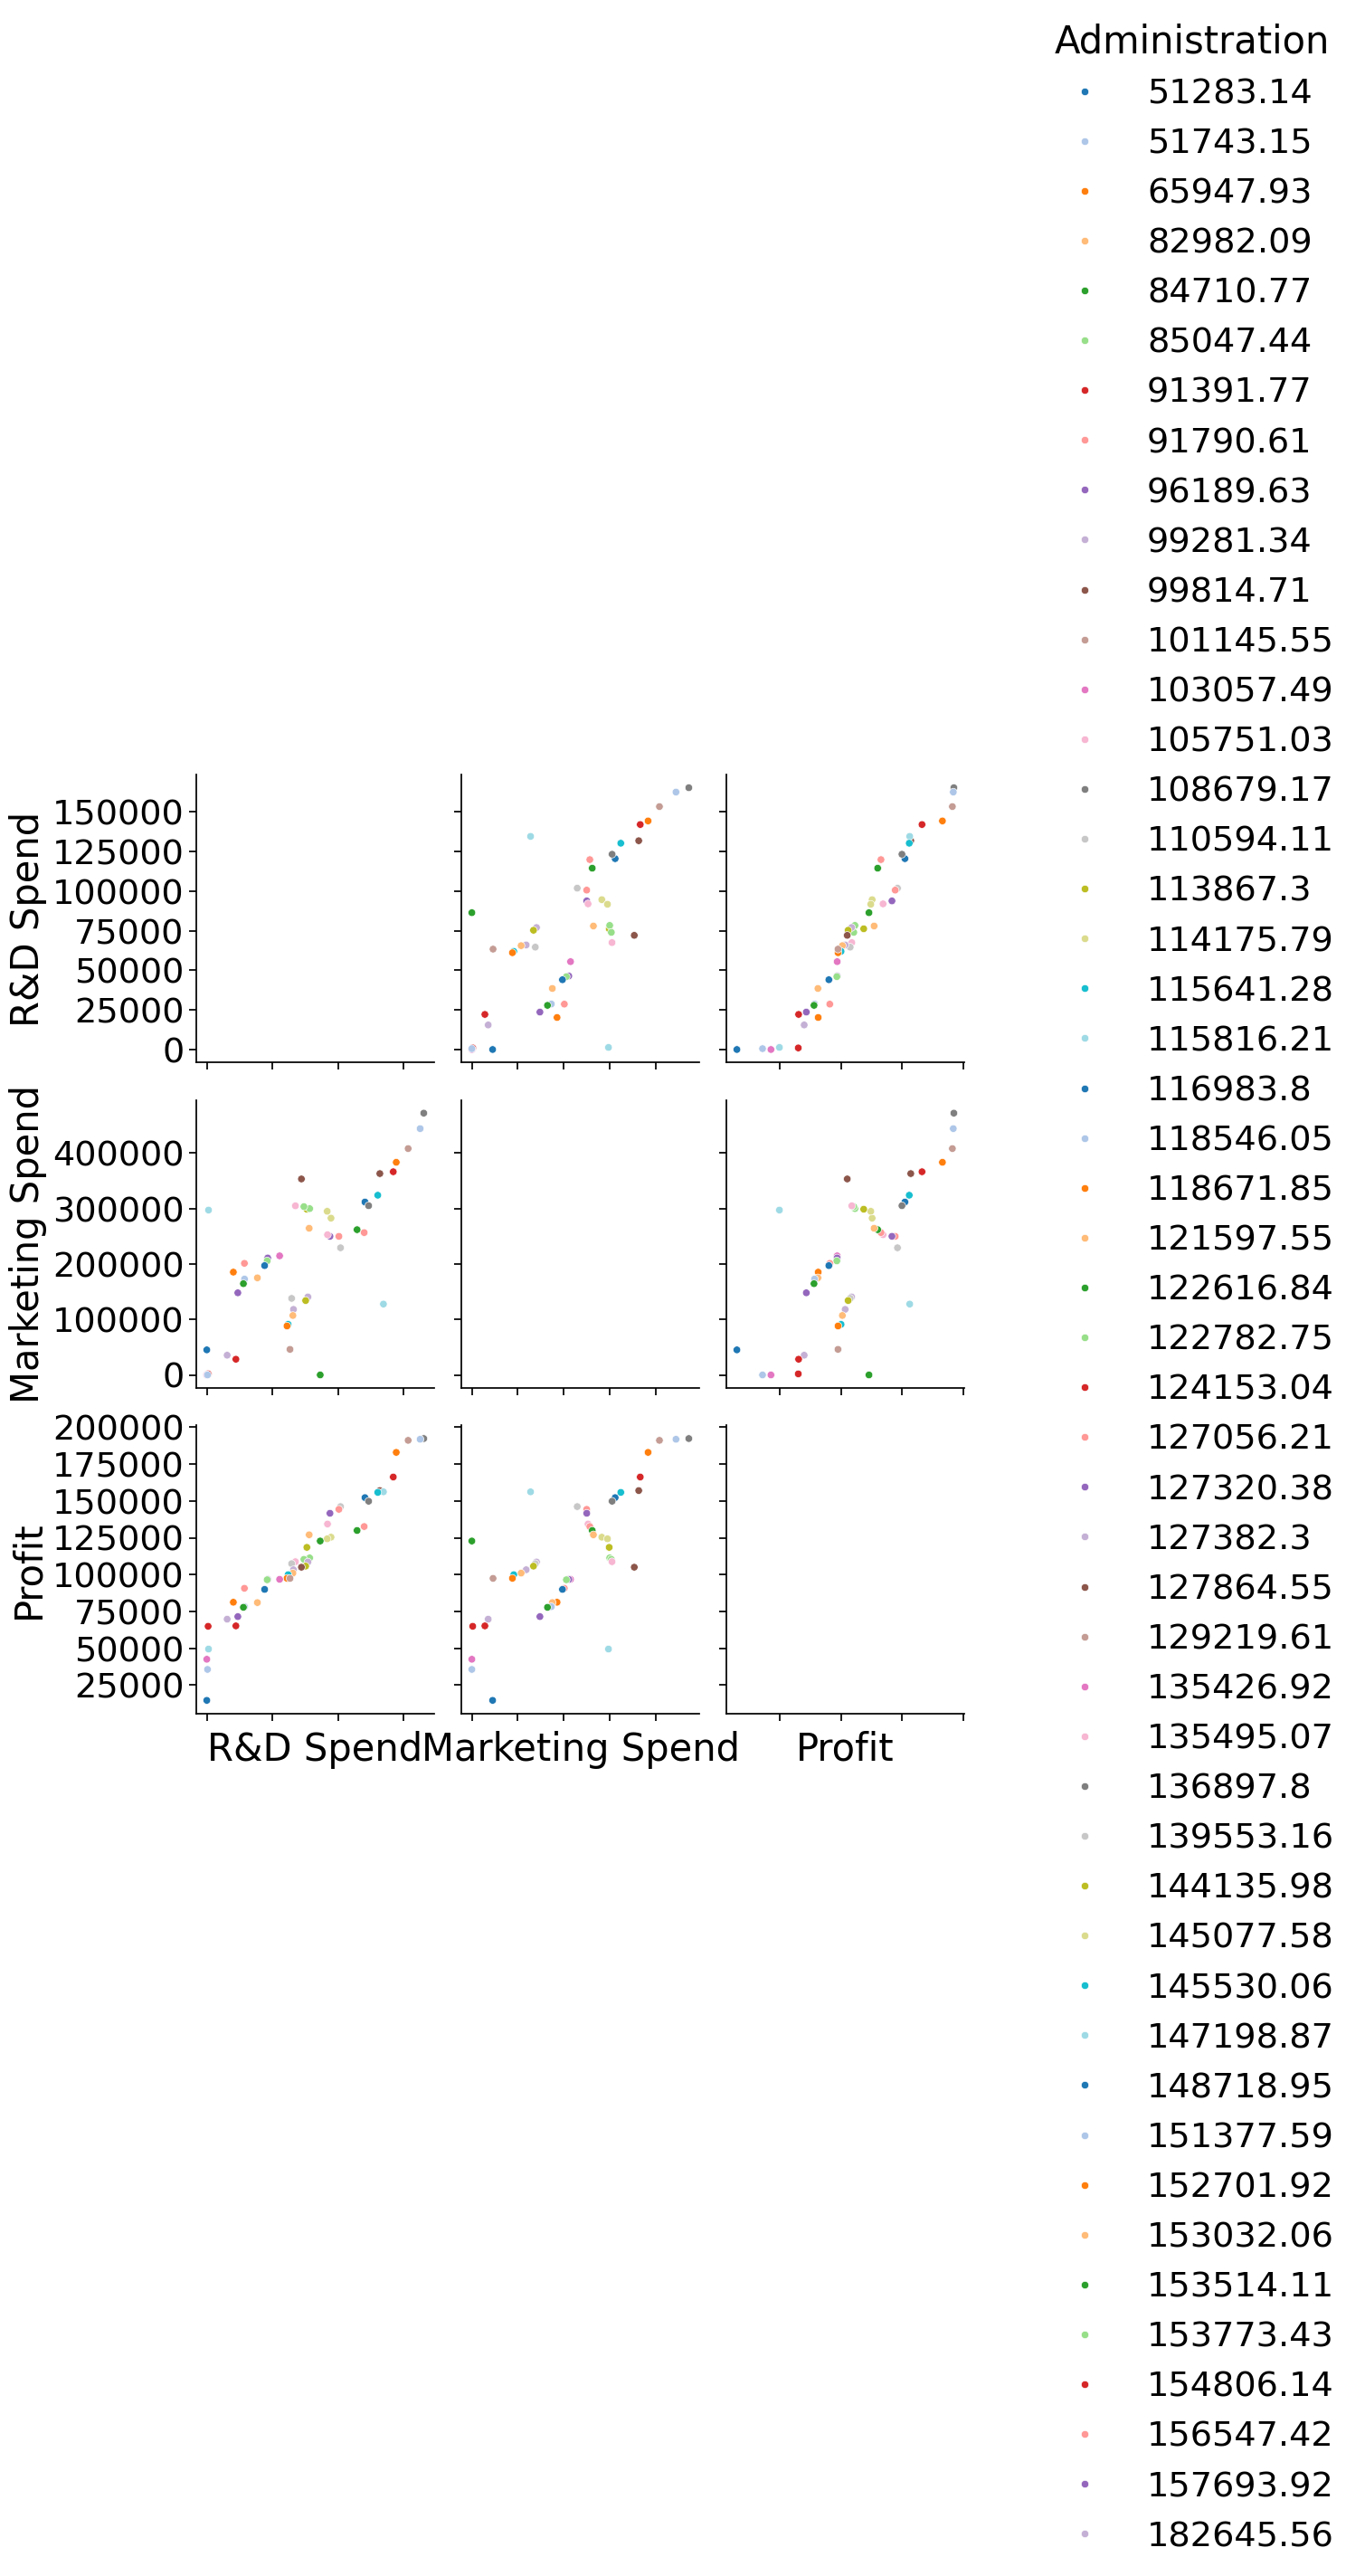

In [8]:
import seaborn as sns
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(data,hue='Administration', palette='tab20',size=4)

g.set(xticklabels=[]);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


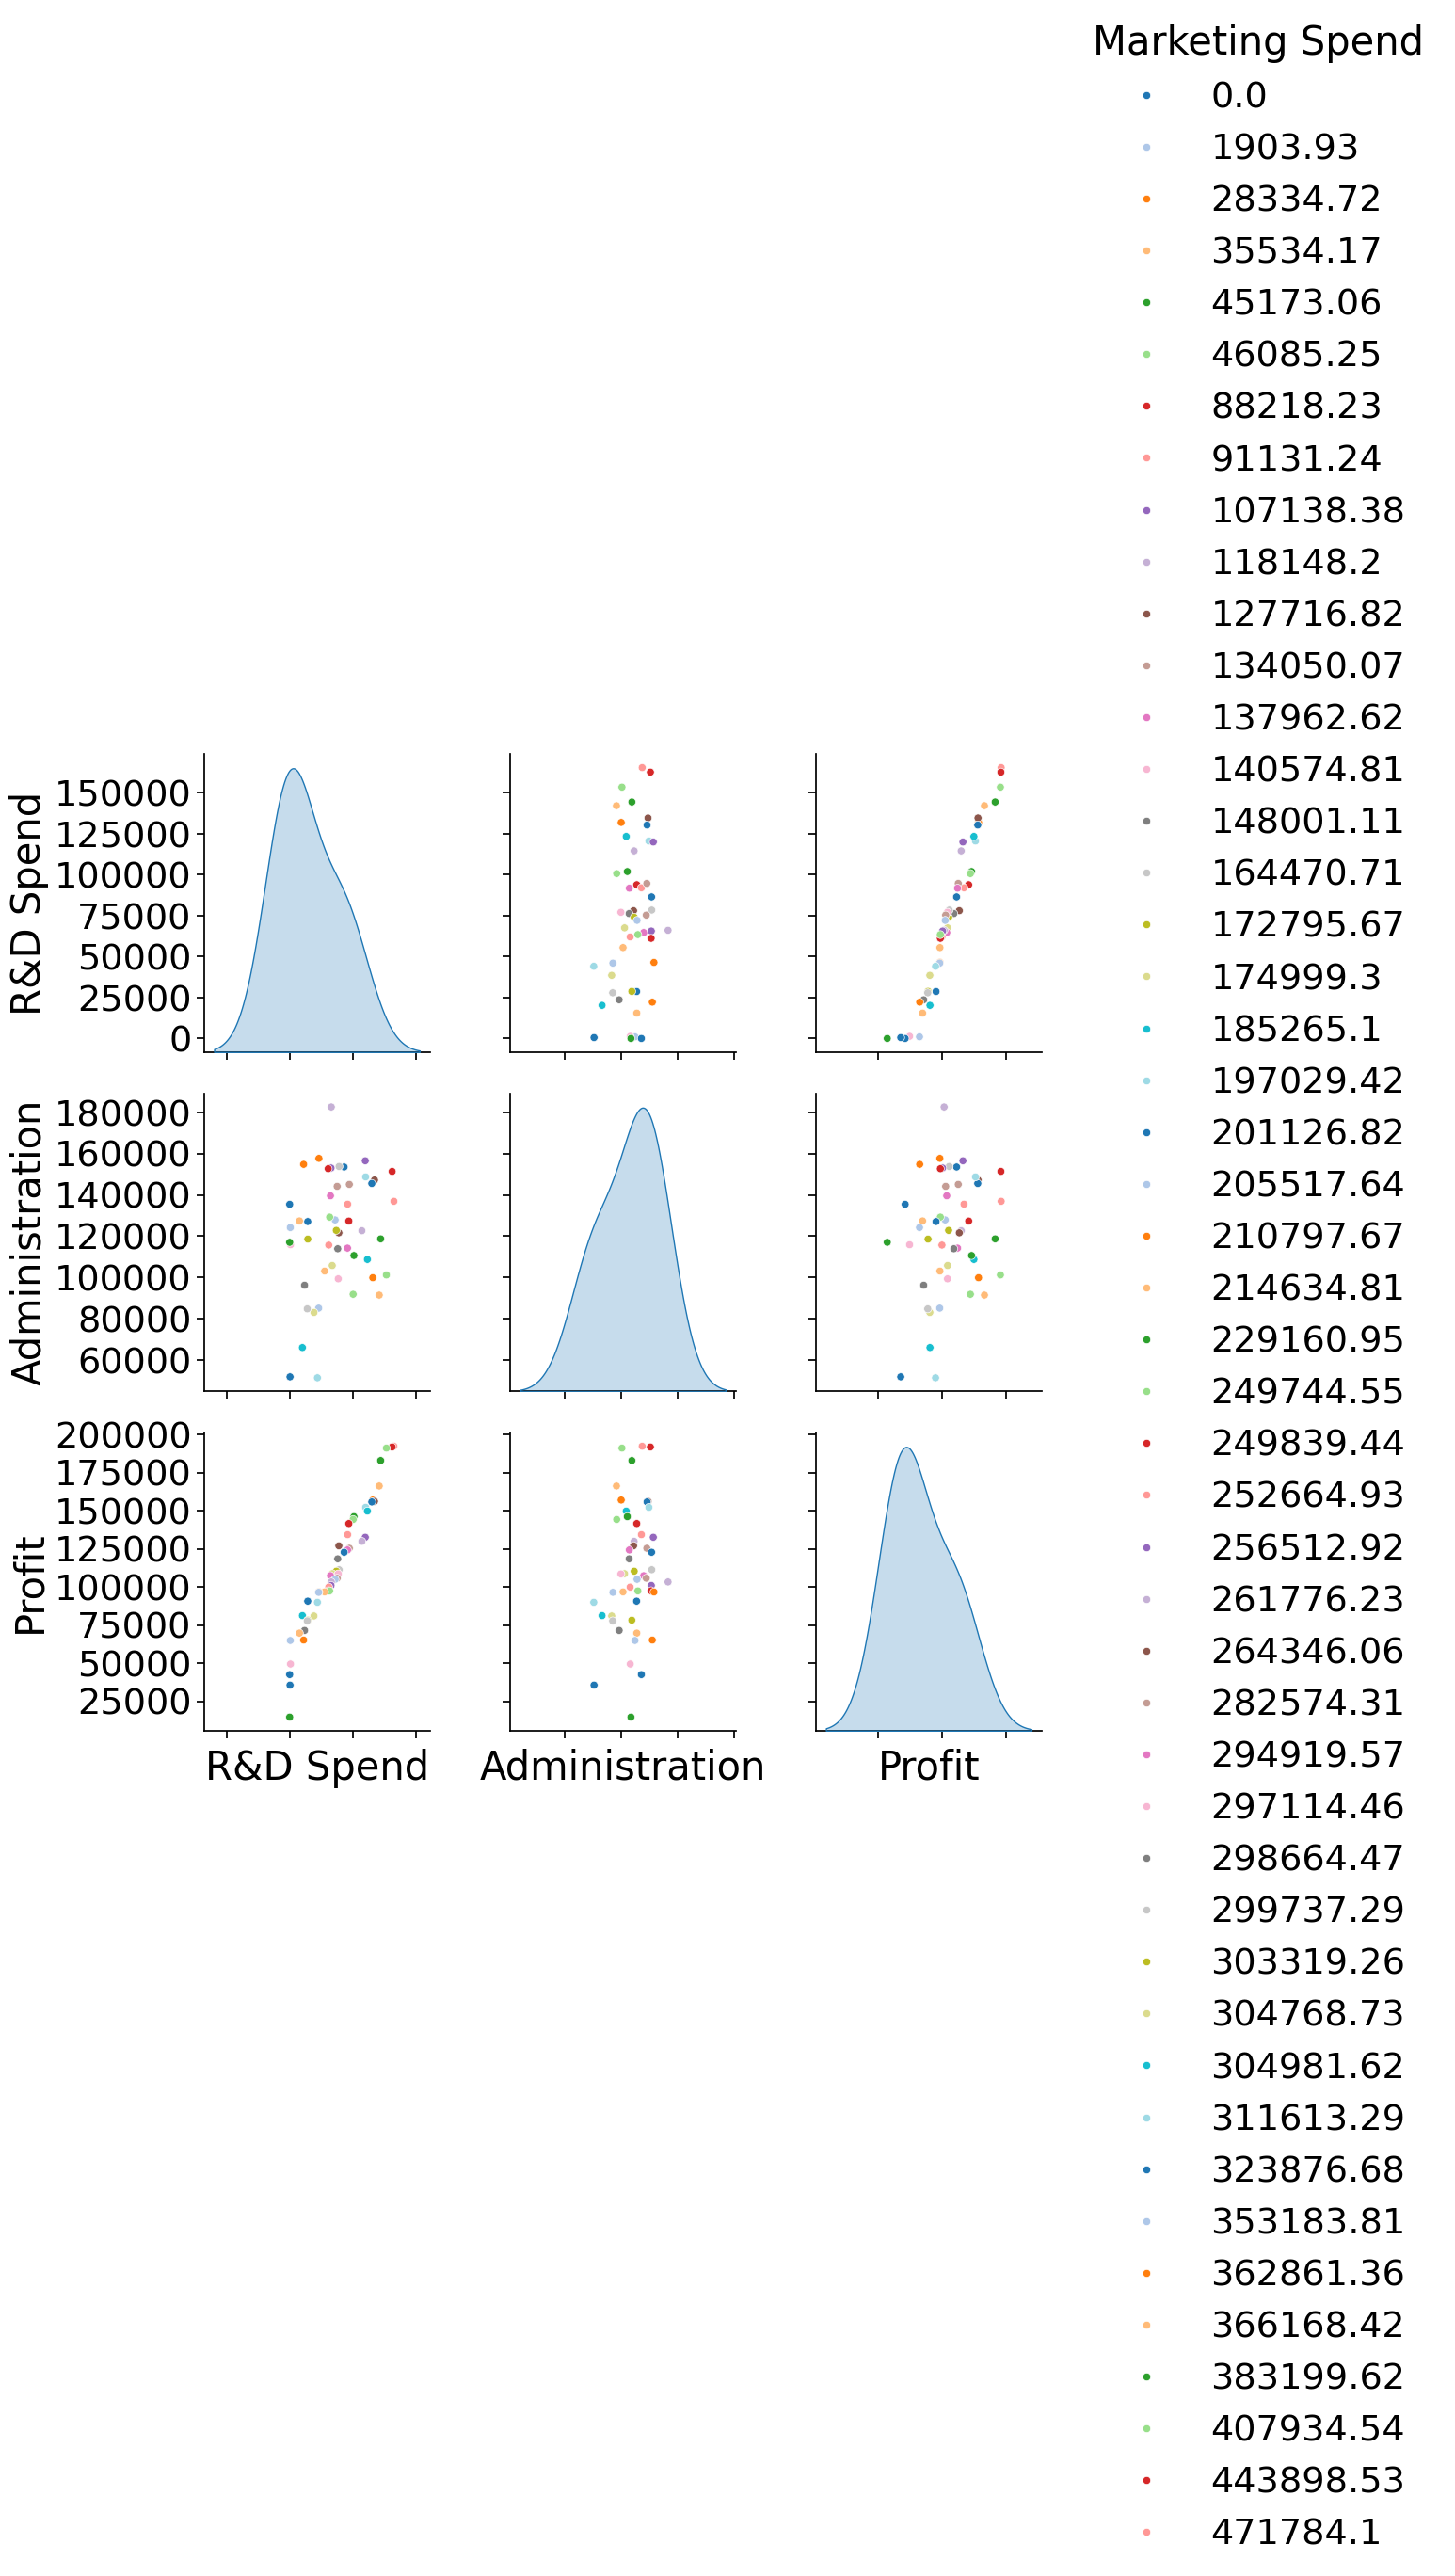

In [9]:
import seaborn as sns
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(data,hue='Marketing Spend', palette='tab20',size=4)

g.set(xticklabels=[]);

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
12,93863.75,127320.38,249839.44,0,1,0
4,142107.34,91391.77,366168.42,0,1,0
37,44069.95,51283.14,197029.42,1,0,0
8,120542.52,148718.95,311613.29,0,0,1
3,144372.41,118671.85,383199.62,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
41,27892.92,84710.77,164470.71,0,1,0
46,1315.46,115816.21,297114.46,0,1,0
47,0.00,135426.92,0.00,1,0,0
15,114523.61,122616.84,261776.23,0,0,1


In [12]:
y_train

,Profit
12,141585.52
4,166187.94
37,89949.14
8,152211.77
3,182901.99
6,156122.51
41,77798.83
46,49490.75
47,42559.73
15,129917.04


In [13]:
y_test

,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37
48,35673.41
26,105733.54
25,107404.34
32,97427.84
19,122776.86


In [14]:
reg=LinearRegression()
print("Done")

Done


In [15]:
model=reg.fit(x,y)
print(reg.intercept_)
print(reg.coef_)

[50177.64442285]
[[ 8.06023114e-01 -2.70043196e-02  2.69798610e-02 -5.23005912e+01
   1.46488202e+02 -9.41876104e+01]]


In [16]:
y_pred=reg.predict(x)
print(y_pred)

[[192390.57136321]
 [189071.32010494]
 [182276.18673283]
 [173584.97618975]
 [172277.13381666]
 [163473.8071184 ]
 [158099.29278417]
 [160155.64464939]
 [151634.74332631]
 [154829.66252708]
 [135664.64259063]
 [135528.60078159]
 [129282.91780691]
 [127431.24898632]
 [149694.3827755 ]
 [146143.63551378]
 [116854.0745287 ]
 [130085.40993359]
 [129149.72574273]
 [115594.18840731]
 [116570.73444001]
 [117201.50508975]
 [114833.30513844]
 [110123.79610587]
 [113294.37345154]
 [102200.26891867]
 [110765.3011688 ]
 [114279.80403012]
 [101818.58738693]
 [101721.04202941]
 [ 99629.0105373 ]
 [ 97617.29632021]
 [ 98988.23660304]
 [ 98061.35894838]
 [ 88974.70416296]
 [ 90420.00960609]
 [ 75423.09286561]
 [ 89577.70222194]
 [ 69606.52160902]
 [ 83684.9760399 ]
 [ 74762.74617648]
 [ 74956.31104907]
 [ 70575.99371382]
 [ 60100.2682187 ]
 [ 64585.14721293]
 [ 47588.36470994]
 [ 56272.99268497]
 [ 46468.23200485]
 [ 49123.07308284]
 [ 48185.0387926 ]]


In [17]:
rmse=np.sqrt((mean_squared_error(y_pred,y)))
print(rmse)

8854.761029414494


In [18]:
r2score = reg.score(x,y)
print(r2score)

0.9507524843355148


In [19]:
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
# Calculate total variance
total_variance = np.var(np.concatenate((y_train, y_test)))
print("variance:",total_variance)
# Get number of features
k = x_train.shape[1]  # or X_test.shape[1] (both should be the same)
print("k:",k)
# Get total number of data points
n = len(y_train) + len(y_test)
print("n:",n)
data.head()

variance: 1592096409.9429832
k: 6
n: 50


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
import scipy.stats as stats

# Assuming you have model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

for i in range(len(coefficients)):
    t_statistic = coefficients[i] / np.sqrt(np.var(coefficients[i]))  # Assuming you have feature variances
    p_value = stats.t.sf(np.abs(t_statistic), n - k - 1) * 2  # Two-tailed test
    print("Coefficient", i, "t-statistic:", t_statistic)
    print("p-value:", p_value)


Coefficient 0 t-statistic: [ 1.08575623e-02 -3.63762624e-04  3.63433154e-04 -7.04516929e-01
  1.97327440e+00 -1.26875747e+00]
p-value: [0.99138731 0.99971144 0.9997117  0.48490934 0.05491365 0.21135303]


In [22]:
#F-test
import scipy.stats as stats

# Assuming you have the R^2 score, residual sum of squares, number of features, and sample size
f_statistic = ((r2score * total_variance) / (k - 1)) / (((1 - r2score) * total_variance) / (n - k - 1))
p_value = stats.f.sf(f_statistic, k - 1, n - k - 1)  # Get p-value for F-statistic
print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 166.0280981682471
p-value: 5.842966033631568e-27


In [23]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
# X=sm.add_constant(x_train)
# model = sm.OLS(y_train, X).fit()
# anova_lm(model)
# #print(anova_results)

In [24]:
data2=data.rename(columns={'R&D Spend':'RnDSpend','Marketing Spend':'MarketingSpend'})
data2

,RnDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


HYPOTHESIS TESTING

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
result.rename(columns = {'R&D Spend':'RnD'}, inplace = True)
result.rename(columns = {'Marketing Spend':'Marketting'}, inplace = True)
result.rename(columns = {'State_New York':'State_NY'}, inplace = True)

In [ ]:
model = ols('Profit ~ RnD + Administration + Marketting + State_California + State_Florida +State_NY ', data=result).fit()

ANNOVA TEST

In [41]:
anova_table = sm.stats.anova_lm(model)
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
                    df        sum_sq       mean_sq           F        PR(>F)
RnD                1.0  7.534877e+10  7.534877e+10  845.678271  2.296696e-30
Administration     1.0  1.017049e+08  1.017049e+08    1.141487  2.911651e-01
Marketting         1.0  2.334854e+08  2.334854e+08    2.620527  1.126363e-01
State_California   1.0  5.370007e+04  5.370007e+04    0.000603  9.805249e-01
State_Florida      1.0  4.629565e+05  4.629565e+05    0.005196  9.428623e-01
State_NY           1.0  3.388815e+08  3.388815e+08    3.803442  5.753603e-02
Residual          44.0  3.920340e+09  8.909863e+07         NaN           NaN


F-Test

In [42]:
f_value = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]
print("\nF-test:")
print("F-value:", f_value)
print("p-value:", p_value)


F-test:
F-value: 845.6782711899004
p-value: 2.296696417064179e-30


T-Test

In [43]:
t_values = model.tvalues[1:]  # Exclude intercept
p_values = model.pvalues[1:]  # Exclude intercept
print("\nt-test:")
for i, (t_value, p_value) in enumerate(zip(t_values, p_values), start=1):
    print(f"X{i} - t-value: {t_value}, p-value: {p_value}")


t-test:
X1 - t-value: 17.368580459369877, p-value: 2.5787719196017313e-21
X2 - t-value: -0.5170116482834387, p-value: 0.6077373266577779
X3 - t-value: 1.5738894453835568, p-value: 0.12267692730451794
X4 - t-value: 5.0992422740754675, p-value: 6.942555004978866e-06
X5 - t-value: 4.654306342194377, p-value: 2.9925034639219795e-05
X6 - t-value: 5.00740111820916, p-value: 9.40901006263703e-06


VIF

In [45]:
vif = pd.DataFrame()
vif["Variable"] = [ 'RnD','Administration','Marketting' ,'State_California' ,'State_Florida','State_NY']
vif["VIF"] = [variance_inflation_factor(result[[ 'RnD','Administration','Marketting' ,'State_California' ,'State_Florida','State_NY']].values, i) for i in range(6)]
print(vif)

           Variable       VIF
0               RnD  2.495511
1    Administration  1.177766
2        Marketting  2.416797
3  State_California  9.044052
4     State_Florida  9.443578
5          State_NY  9.222969


COLINEARITY

In [39]:
corr=result.corr()
corr

,RnD,Administration,Marketting,State_California,State_Florida,State_NY,Profit
RnD,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068,0.972900
Administration,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145,0.200717
Marketting,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670,0.747766
State_California,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152,-0.145837
State_Florida,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366,0.116244
State_NY,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000,0.031368
Profit,0.972900,0.200717,0.747766,-0.145837,0.116244,0.031368,1.000000


HEATMAP

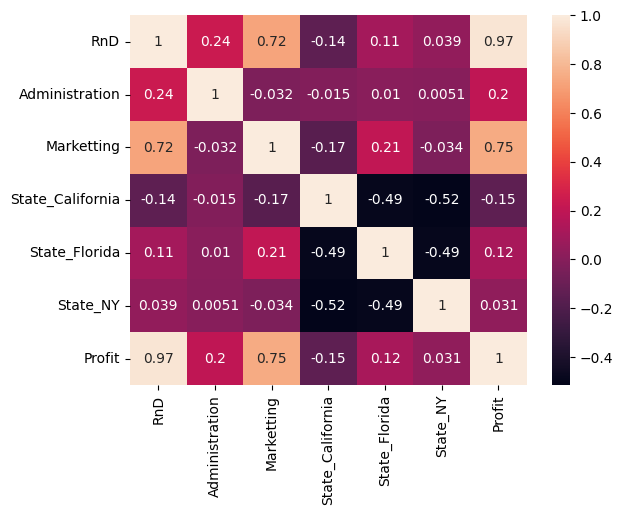

In [40]:
sns.heatmap(corr,annot=True)
plt.show()